In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [111]:
data = pd.read_csv('./data/dataset.csv')
sub = pd.read_csv('./data/submission.csv')

In [ ]:
#先按照规则把风轮转速范围，风速超出范围的直接标注
#按风轮型号不同分别进行统计
#按时间粒度进行时间序列分析


In [ ]:
for i in [1,2,3,4,6,7,8,9,10]:
    if data

In [107]:
model_isof = IsolationForest(n_estimators=500)
#尝试一下把windnumber放进去一起，再尝试一下每个windnumber单独做
outlier_label = model_isof.fit_predict(data[['RotorSpeed']])
outlier_pd = pd.DataFrame(outlier_label, columns=['outlier_label'])

data_merge = pd.concat((data, outlier_pd), axis=1)

data_merge['outlier_label'] = data_merge['outlier_label']+2
data_merge['outlier_label'] = data_merge['outlier_label'].astype('str').str.replace('3','0').astype('int')

In [108]:
sub['label'] = data_merge['outlier_label']

sub.to_csv('sub.csv',index=None)

In [122]:
data_merge[497800:]

,WindNumber,Time,WindSpeed,Power,RotorSpeed,max_WindSpeed,min_WindSpeed,median_WindSpeed,mean_WindSpeed,max_Power,...,WindNumber_RotorSpeed_max,WindNumber_RotorSpeed_min,WindNumber_RotorSpeed_std,WindSpeed_Power_ratio,WindSpeed_RotorSpeed_ratio,Power_WindSpeed_ratio,Power_RotorSpeed_ratio,RotorSpeed_WindSpeed_ratio,RotorSpeed_Power_ratio,outlier_label
497800,12,2019/12/31 17:40,1.532000,0.730000,2.61950,5.773500,1.532000,3.521750,3.714792,482.435000,...,15.704083,-0.0075,5.142694,2.098630,0.584844,0.476501,0.278679,1.709856,3.588356,1
497801,12,2019/12/31 17:50,2.163500,0.000000,0.00000,5.773500,1.532000,3.420667,3.579800,482.435000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497802,12,2019/12/31 18:00,1.304833,0.000000,0.00000,5.167833,1.304833,3.370583,3.356367,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497803,12,2019/12/31 18:10,0.603854,0.000000,0.00000,5.167833,0.603854,3.295667,3.155718,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497804,12,2019/12/31 18:20,0.503523,0.000000,0.00000,5.167833,0.503523,3.223833,2.970935,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497805,12,2019/12/31 18:30,0.731333,0.000000,0.00000,5.167833,0.503523,3.011750,2.772394,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497806,12,2019/12/31 18:40,0.940833,0.000000,0.00000,5.167833,0.503523,2.777417,2.640360,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497807,12,2019/12/31 18:50,0.821667,0.000000,0.00000,5.167833,0.503523,2.530917,2.513352,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497808,12,2019/12/31 19:00,0.715500,0.000000,0.00000,5.167833,0.503523,2.286333,2.376027,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0
497809,12,2019/12/31 19:10,0.476190,0.000000,0.00000,5.167833,0.476190,2.211917,2.230870,354.725000,...,15.704083,-0.0075,5.142694,inf,inf,0.000000,NaN,0.000000,NaN,0


In [ ]:
#baseline:0.39535768257
#只对rotorspeed做树，500:0.41577290285
#增加除法,500,:


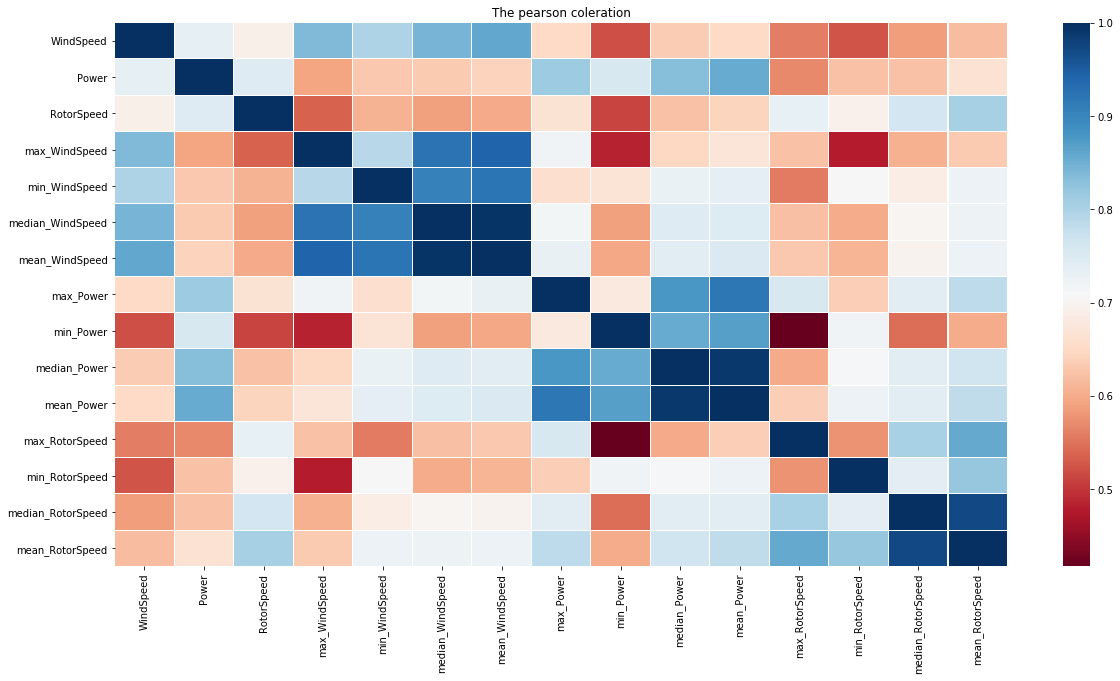

In [81]:
def draw_correlation_heatmap(data: pd.DataFrame, way:str = 'pearson')->None:
    feature = data.copy()
    plt.figure(figsize=(20,10))
    plt.title('The ' + way +' coleration')
    sns.heatmap(feature[[x for x in feature.columns if x not in ['Time','WindNumber'] ]].corr(way),linecolor='white',
        linewidths=0.1,
        cmap="RdBu")
    
draw_correlation_heatmap(data)

In [ ]:
def draw_pointplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(2, figsize=(12, 10))
    count = 0
    for i in [x for x in data.columns if x not in ['Time','RotorSpeed','WindNumber']]:
        sns.pointplot(x=i, y='RotorSpeed', data=data, ax=axes[count//2],hue='WindNumber')
        count += 1
        
draw_pointplot(data)

In [ ]:
def draw_boxplot(data: pd.DataFrame)->None:
    f, axes = plt.subplots(2, figsize=(12, 10))
    count = 0
    for i in [x for x in data.columns if x not in ['Time','RotorSpeed','WindNumber']]:
        sns.boxenplot(x=i, y='RotorSpeed', data=data, ax=axes[count//2],hue='WindNumber')
        count += 1
        
draw_boxplot(data)